In [18]:
import pyfar as pf
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

In [5]:

data_ir, source_coordinates, receiver_coordinates = pf.io.read_sofa(
    '../assets/pp2_HRIRs_measured.sofa')

/home/leto/data/projects/uni/SpatialPanner/venv/lib/python3.12/site-packages/pyfar/classes/coordinates.py:1050: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  warnings.warn((


In [7]:
_, mask = source_coordinates.find_slice(
    'elevation', unit='deg', value=0, show=True)

/home/leto/data/projects/uni/SpatialPanner/venv/lib/python3.12/site-packages/pyfar/classes/coordinates.py:2137: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0. Use properties and slicing instead.'
  warnings.warn((


/home/leto/data/projects/uni/SpatialPanner/venv/lib/python3.12/site-packages/pyfar/classes/coordinates.py:786: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of the `spherical_*` properties.'
  warnings.warn((


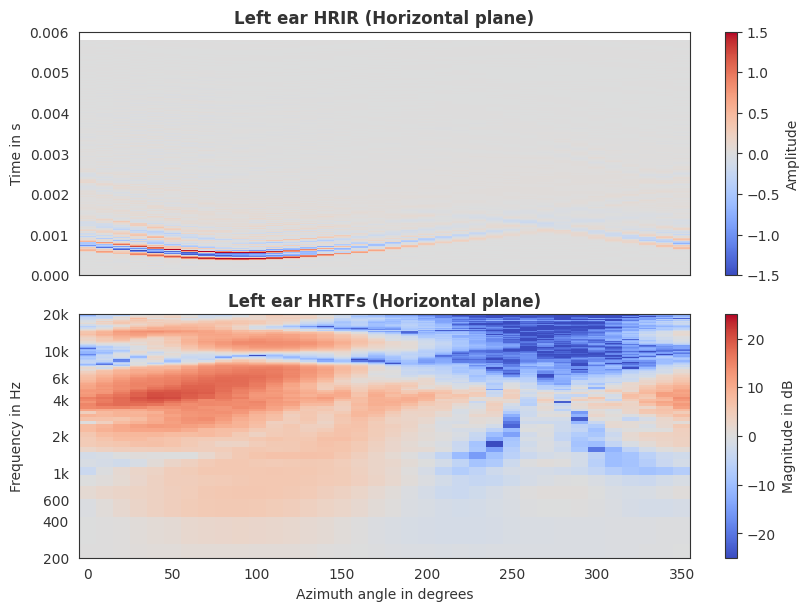

In [16]:
with pf.plot.context():
    plt.subplots(2, 1, figsize=(8, 6), sharex=True)

    angles = source_coordinates.get_sph('top_elev', 'deg')[mask, 0]

    ax, qm, cb = pf.plot.time_freq_2d(data_ir[mask, 0], indices=angles,
                                    cmap=mpl.colormaps.get_cmap('coolwarm'))

    ax[0].set_title("Left ear HRIR (Horizontal plane)")
    ax[0].set_xlabel("")
    ax[0].set_ylim(0, 0.006)
    qm[0].set_clim(-1.5, 1.5)

    ax[1].set_title("Left ear HRTFs (Horizontal plane)")
    ax[1].set_xlabel("Azimuth angle in degrees")
    ax[1].set_ylim(200, 20e3)
    qm[1].set_clim(-25, 25)

    plt.tight_layout
    plt.show()

In [20]:
def plot_sofa_file(filename, name):
    data_ir, source_coordinates, receiver_coordinates = pf.io.read_sofa(filename)
    _, mask = source_coordinates.find_slice('elevation', unit='deg', value=0, show=False)

    with pf.plot.context():
        plt.subplots(2, 1, figsize=(8, 6), sharex=True)

        angles = source_coordinates.get_sph('top_elev', 'deg')[mask, 0]

        ax, qm, cb = pf.plot.time_freq_2d(data_ir[mask, 0], indices=angles,
                                        cmap=mpl.colormaps.get_cmap('coolwarm'))

        ax[0].set_title("Left ear HRIR (Horizontal plane)")
        ax[0].set_xlabel("")
        ax[0].set_ylim(0, 0.006)
        qm[0].set_clim(-1.5, 1.5)

        ax[1].set_title("Left ear HRTFs (Horizontal plane)")
        ax[1].set_xlabel("Azimuth angle in degrees")
        ax[1].set_ylim(200, 20e3)
        qm[1].set_clim(-25, 25)

        plt.tight_layout
        plt.show()
        plt.suptitle(name)


/home/leto/data/projects/uni/SpatialPanner/venv/lib/python3.12/site-packages/pyfar/classes/coordinates.py:1050: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  warnings.warn((
/home/leto/data/projects/uni/SpatialPanner/venv/lib/python3.12/site-packages/pyfar/classes/coordinates.py:2137: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0. Use properties and slicing instead.'
  warnings.warn((
/home/leto/data/projects/uni/SpatialPanner/venv/lib/python3.12/site-packages/pyfar/classes/coordinates.py:786: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of the `spherical_*` properties.'
  warnings.warn((


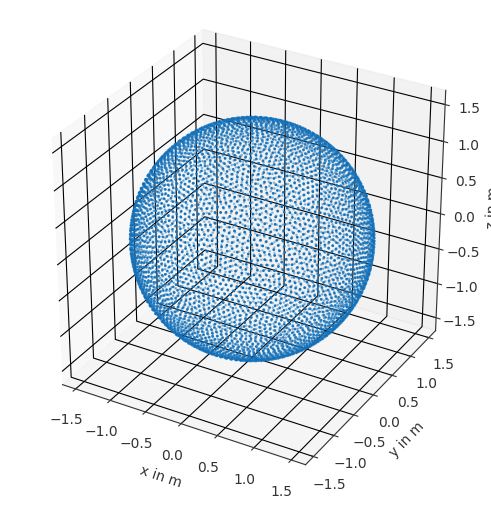

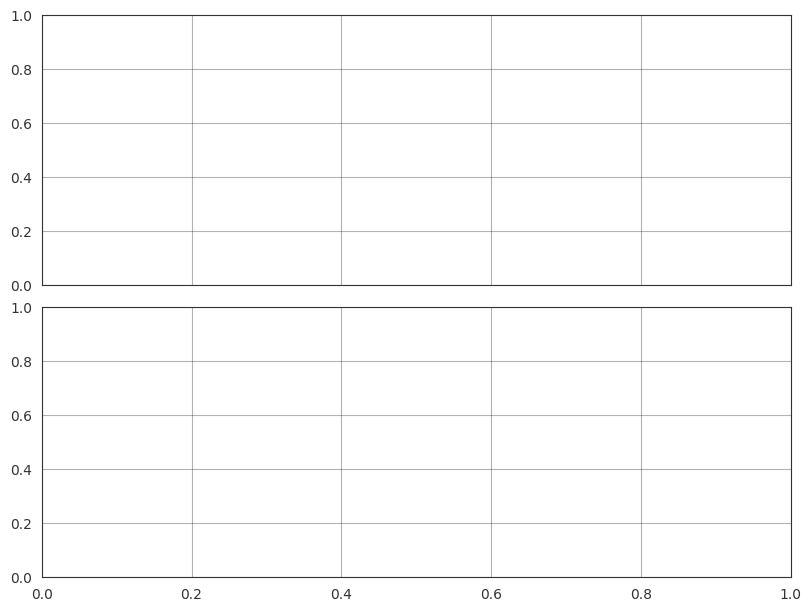

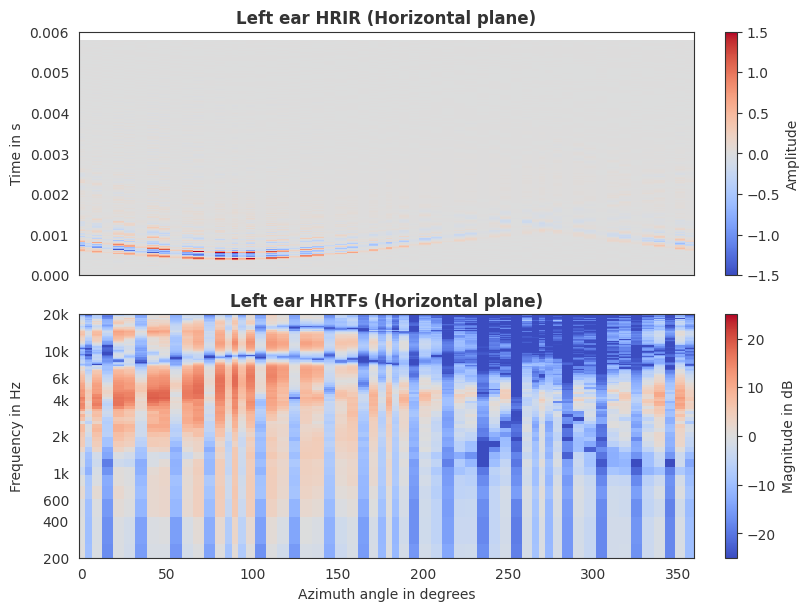

/home/leto/data/projects/uni/SpatialPanner/venv/lib/python3.12/site-packages/pyfar/classes/coordinates.py:1050: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  warnings.warn((
/home/leto/data/projects/uni/SpatialPanner/venv/lib/python3.12/site-packages/pyfar/classes/coordinates.py:2137: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0. Use properties and slicing instead.'
  warnings.warn((
/home/leto/data/projects/uni/SpatialPanner/venv/lib/python3.12/site-packages/pyfar/classes/coordinates.py:786: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of the `spherical_*` properties.'
  warnings.warn((


<Figure size 640x480 with 0 Axes>

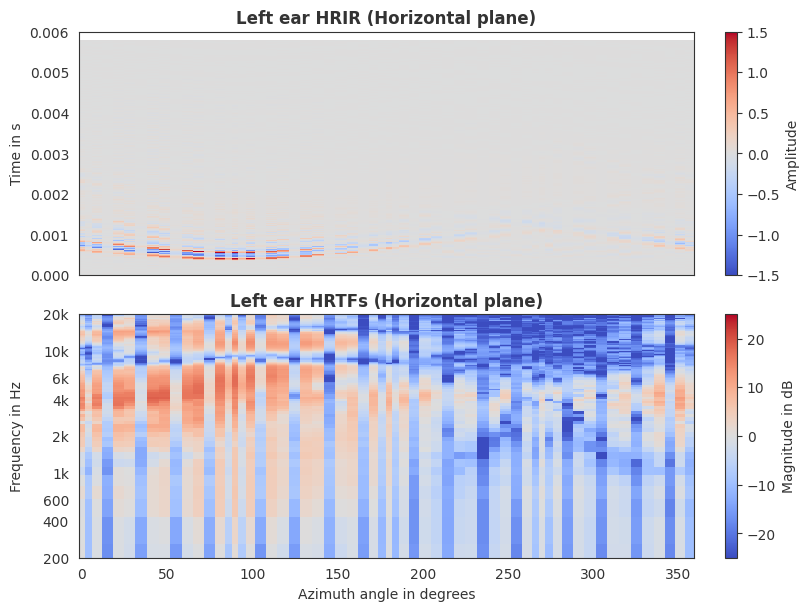

/home/leto/data/projects/uni/SpatialPanner/venv/lib/python3.12/site-packages/pyfar/classes/coordinates.py:1050: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  warnings.warn((
/home/leto/data/projects/uni/SpatialPanner/venv/lib/python3.12/site-packages/pyfar/classes/coordinates.py:2137: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0. Use properties and slicing instead.'
  warnings.warn((
/home/leto/data/projects/uni/SpatialPanner/venv/lib/python3.12/site-packages/pyfar/classes/coordinates.py:786: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of the `spherical_*` properties.'
  warnings.warn((


ValueError: signal.cshape must be (m, ) with m>=2 but is (0,)

In [21]:
basepath = Path("../assets")
for filename, name in [
    ("pp2_HRIRs_interpolated_mca.sofa", "Interpolated MCA"),
    ("pp2_HRIRs_interpolated_sh.sofa", "Interpolated SH"),
    # ("pp2_HRIRs_measured_interpolated.sofa", "Interpolated Geheime Andere Methode"),
    ("pp2_HRIRs_measured.sofa", "Measured"),
]:
    plot_sofa_file(basepath / filename, name)